<a href="https://colab.research.google.com/github/aruaru0/yolov8-test/blob/main/YOLOv8_segmentation_test_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.5/644.5 kB 9.0 MB/s eta 0:00:00


# Training

In [2]:
from ultralytics import YOLO

# Load a model
# model = YOLO('yolov8n-seg.yaml')  # build a new model from YAML
# model = YOLO('yolov8n-seg.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov8n-seg.yaml').load('yolov8n.pt')  # build from YAML and transfer weights

# Train the model
results = model.train(data='coco128-seg.yaml', epochs=100, imgsz=640)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

# 検証

In [3]:
metrics = model.val()

Ultralytics YOLOv8.0.199 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3404320 parameters, 0 gradients, 12.6 GFLOPs
val: Scanning /content/datasets/coco128-seg/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:14<00:00,  1.81s/it]
                   all        128        929      0.878      0.779      0.872      0.717      0.795      0.668       0.69      0.387
                person        128        254      0.964      0.731      0.876      0.691      0.852       0.61      0.672      0.258
               bicycle        128          6      0.863        0.5      0.639      0.502      0.905        0.5      0.498      0.291
                   car        128         46      0.911      0.447      0.578      0.307      0.8

In [4]:
metrics.box.map,    # map50-95(B)
metrics.box.map50,  # map50(B)
metrics.box.map75,  # map75(B)
metrics.box.maps,  # a list contains map50-95(B) of each category
metrics.seg.map,    # map50-95(M)
metrics.seg.map50,  # map50(M)
metrics.seg.map75,  # map75(M)
metrics.seg.maps   # a list contains map50-95(M) of each category

array([    0.25804,     0.29114,     0.14663,     0.42435,     0.46032,     0.56897,     0.85296,     0.24036,     0.17037,     0.18825,     0.38666,      0.6965,     0.38666,     0.15882,     0.34081,     0.67713,     0.48674,      0.0995,     0.38666,     0.38666,     0.43075,      0.8955,     0.78283,     0.29926,
           0.10677,     0.17057,     0.19103,     0.30946,     0.57424,     0.47156,       0.398,     0.11582,     0.25759,     0.11392,     0.18746,     0.22533,      0.2802,     0.38666,     0.22876,     0.36332,       0.148,     0.45185,      0.1718,     0.21264,    0.095108,     0.22594,      0.6965,     0.38666,
            0.5205,     0.39177,     0.32967,     0.38234,     0.45005,     0.74397,     0.43975,     0.79826,     0.21726,     0.28436,     0.42608,      0.4852,    0.084647,     0.70025,      0.8955,     0.20642,     0.35175,     0.27313,     0.38666,      0.1939,     0.84122,     0.52699,     0.38666,     0.38993,
           0.74655,     0.20091,     0.6690

In [5]:
metrics.seg.map, metrics.seg.map50, metrics.seg.map75

(0.3866552066140474, 0.6902842953588838, 0.37896791335677443)

# アノテーションデータを画像に重ねて表示

In [33]:
import cv2
from google.colab.patches import cv2_imshow

imgfile = "/content/datasets/coco128-seg/images/train2017/000000000605.jpg"
txtfile = "/content/datasets/coco128-seg/labels/train2017/000000000605.txt"

img = cv2.imread(imgfile)

In [34]:
import numpy as np
cls = []
poly = []
w, h = img.shape[1], img.shape[0]
with open(txtfile, "r") as f :
  for line in f:
    x = list(map(float, line.split()))
    cls.append(int(x[0]))
    y = np.array(x[1:]).reshape(-1,2)
    y[:,0] = y[:,0] * w
    y[:,1] = y[:,1] * h
    poly.append(y)

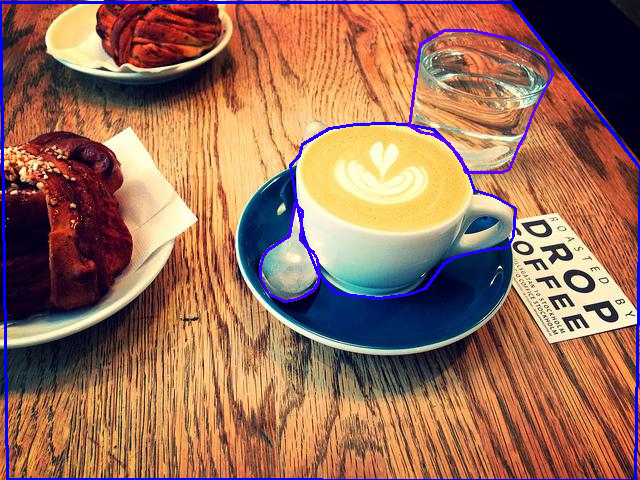

In [35]:
for i, e in enumerate(poly) :
  pos = e.reshape((-1,1,2)).astype(np.int32)
  cv2.polylines(img, [pos], isClosed=True, color= (255, 0, 32*i), thickness=2)
  # cv2.fillPoly(img, [pos], color= (255, 0, 32*i))

cv2_imshow(img)

# 予測

In [37]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [38]:
!wget https://ultralytics.com/images/bus.jpg

--2023-10-17 12:26:36--  https://ultralytics.com/images/bus.jpg
Resolving ultralytics.com (ultralytics.com)... 75.2.70.75, 99.83.190.102
Connecting to ultralytics.com (ultralytics.com)|75.2.70.75|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.ultralytics.com/images/bus.jpg [following]
--2023-10-17 12:26:36--  https://www.ultralytics.com/images/bus.jpg
Resolving www.ultralytics.com (www.ultralytics.com)... 52.206.163.162, 34.234.52.18, 3.233.126.24
Connecting to www.ultralytics.com (www.ultralytics.com)|52.206.163.162|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/ultralytics/yolov5/master/data/images/bus.jpg [following]
--2023-10-17 12:26:36--  https://raw.githubusercontent.com/ultralytics/yolov5/master/data/images/bus.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting 

In [39]:
# model = YOLO('yolov8n-seg.pt')  # load an official model
model = YOLO('/content/runs/segment/train/weights/last.pt')  # load a custom model

# Predict with the model
# results = model('https://ultralytics.com/images/bus.jpg', save=True, save_txt=True)
img = cv2.imread('./bus.jpg')
results = model(img, save=True, save_txt=True)


0: 640x480 4 persons, 1 bus, 49.4ms
Speed: 3.5ms preprocess, 49.4ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/segment/predict
1 label saved to runs/segment/predict/labels


In [40]:
# オブジェクトの種類を調べる
for e in results[0].boxes.cls.cpu():
  print(e, model.names[int(e)])

tensor(5.) bus
tensor(0.) person
tensor(0.) person
tensor(0.) person
tensor(0.) person


In [41]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([5., 0., 0., 0., 0.], device='cuda:0')
conf: tensor([0.8507, 0.8448, 0.8308, 0.7628, 0.2548], device='cuda:0')
data: tensor([[9.8578e+00, 2.2945e+02, 7.9801e+02, 7.6083e+02, 8.5075e-01, 5.0000e+00],
        [6.6996e+02, 3.8075e+02, 8.0937e+02, 8.7732e+02, 8.4476e-01, 0.0000e+00],
        [4.9929e+01, 3.9511e+02, 2.4852e+02, 9.0373e+02, 8.3085e-01, 0.0000e+00],
        [2.2204e+02, 4.0600e+02, 3.4678e+02, 8.5744e+02, 7.6281e-01, 0.0000e+00],
        [1.4773e-01, 5.4964e+02, 7.1638e+01, 8.6804e+02, 2.5476e-01, 0.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (1080, 810)
shape: torch.Size([5, 6])
xywh: tensor([[403.9350, 495.1405, 788.1544, 531.3814],
        [739.6612, 629.0383, 139.4091, 496.5675],
        [149.2259, 649.4180, 198.5940, 508.6164],
        [284.4080, 631.7211, 124.7361, 451.4404],
        [ 35.8930, 708.8408,  71.4905, 318.4083]], device='cuda:0')
xywhn: tensor([[0.4987, 0.4585, 0.97

In [42]:
results[0].masks

ultralytics.engine.results.Masks object with attributes:

data: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0.,

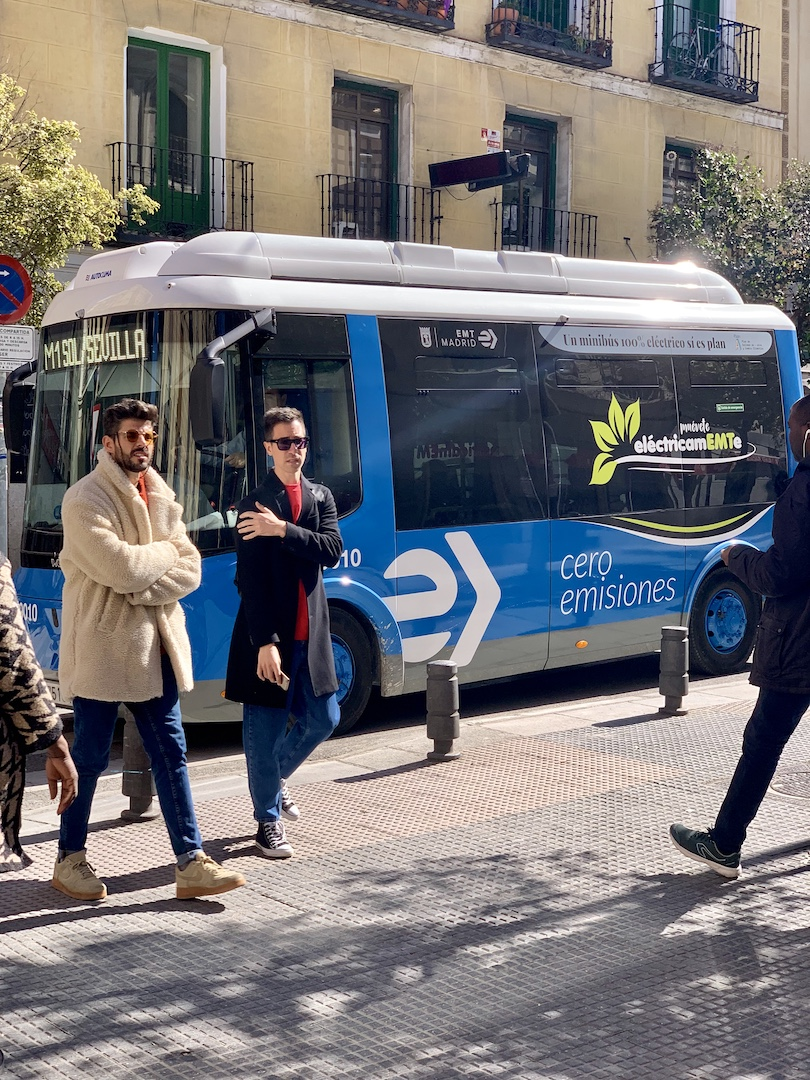

In [34]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
cv2_imshow(img)

In [35]:
for i, e in enumerate(results[0].masks.cpu().xy) :
  pos = e.reshape((-1,1,2)).astype(np.int32)
  cv2.polylines(img, [pos], isClosed=True, color= (255, 0, 32*i), thickness=2)
  # cv2.fillPoly(img, [pos], color= (255, 0, 32*i))

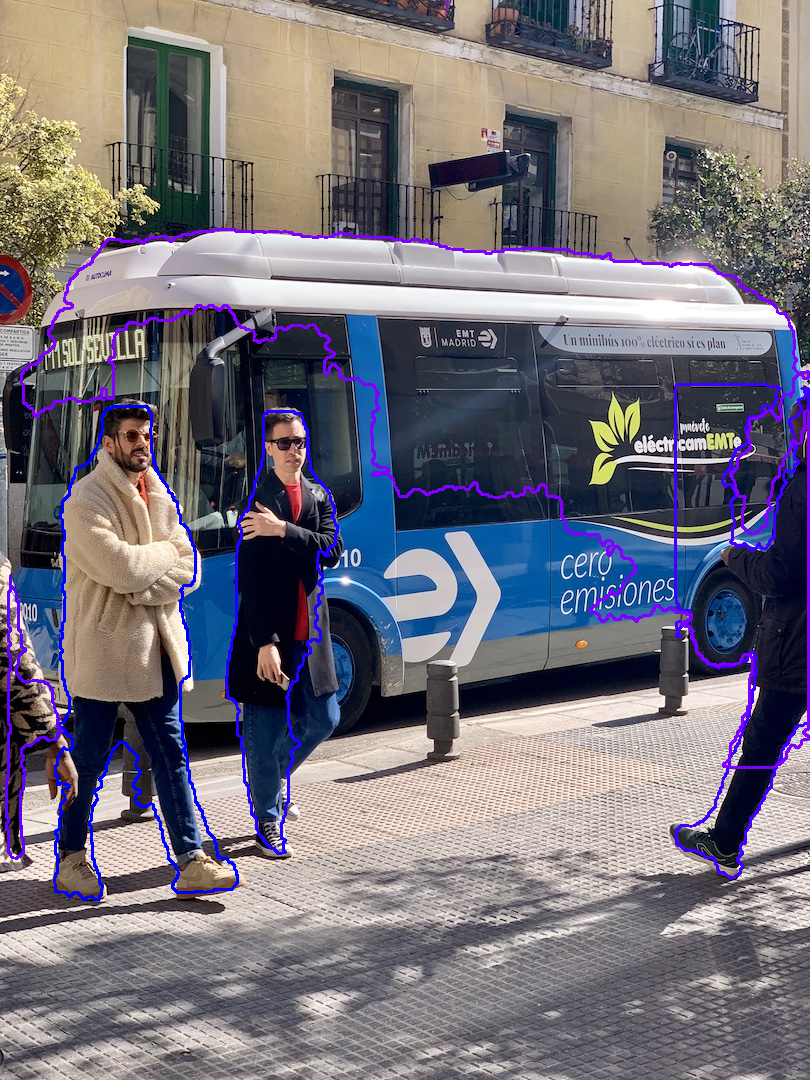

In [36]:
cv2_imshow(img)